In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())
from sensor_msgs.msg import PointCloud2
import irsl_choreonoid_ros.RobotInterface as RI
from irsl_choreonoid_ros.point_utils import convertPointCloud2ToPointsRaw
##
di = DrawInterface()

# ROS environment (not required)

In [2]:
import rospy
rospy.init_node('sample')

# Getting PointCloud2 message

In [3]:
points_topic_name = '/hsrb/head_rgbd_sensor/depth_registered/points'
sub = RI.OneShotSubscriber(points_topic_name, PointCloud2)
pc2msg = sub.waitData(1.0)

# Conversion Points to PointSet

In [4]:
points, colors  = convertPointCloud2ToPointsRaw(pc2msg)

# point-conversion
cds = coordinates(fv(0, 0, 1.0), fv(-0.500, 0.500, -0.500, 0.500))
for p in points:
    cds.transformVector(p)

pp = mkshapes.makePoints(points, pointSize=0.4, colors=[[0.4, 0.4, 0.4]])

## View points

In [5]:
di.addObject(pp)

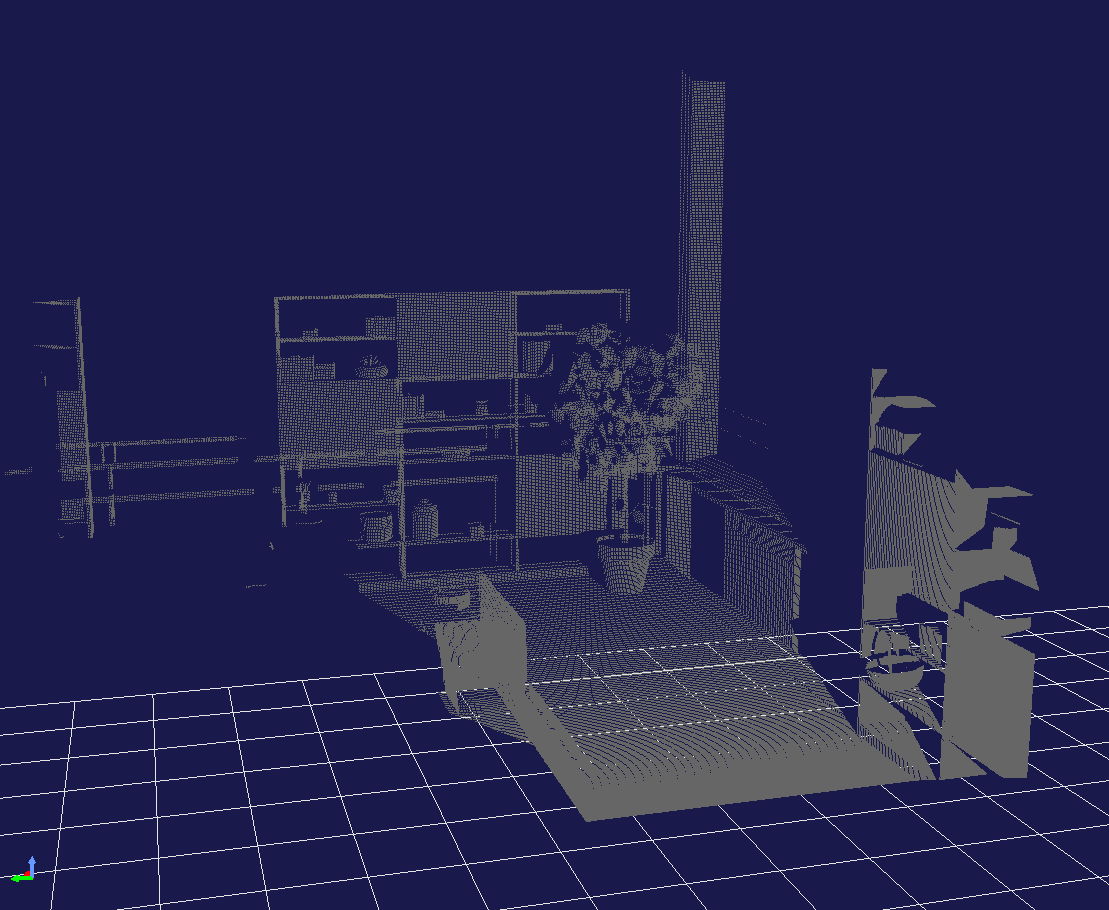

In [6]:
%display

# OctoMap

In [8]:
from cnoid.CGALMesh import SgOctomap
oct_=SgOctomap(0.02) ## 解像度

## add points to octomap

In [9]:
oct_.addPoints(points) ## using points
oct_.prune()

## making boxes for several resolution
解像度の違うボックス表現を得る

関数の定義: addBoxPrimitives(SgGroup, depth, material)

```
depth = 0 (depth = 16に同じ、16はmax-depth)
depth = 15 (解像度が resolution * 2 )
depth = 14 (解像度が resolution * 2^2 )
...
depth = 1 (解像度が resolution * 2^15 )
```

In [10]:
g0 = cutil.SgGroup()
g15 = cutil.SgGroup()
g14 = cutil.SgGroup()
g13 = cutil.SgGroup()
g12 = cutil.SgGroup()
g11 = cutil.SgGroup()
g10 = cutil.SgGroup()
# mat = cutil.SgMaterial()
oct_.addBoxPrimitives(g0,   0, mkshapes.generateMaterial(color=[0.0, 0.7, 0.0]))
oct_.addBoxPrimitives(g15, 15, mkshapes.generateMaterial(color=[0.0, 0.0, 0.7]))
oct_.addBoxPrimitives(g14, 14, mkshapes.generateMaterial(color=[0.7, 0.0, 0.0]))
oct_.addBoxPrimitives(g13, 13, mkshapes.generateMaterial(color=[0.7, 0.0, 0.7]))
oct_.addBoxPrimitives(g12, 12, mkshapes.generateMaterial(color=[0.7, 0.7, 0.0]))
oct_.addBoxPrimitives(g11, 11, mkshapes.generateMaterial(color=[0.0, 0.7, 0.7]))
oct_.addBoxPrimitives(g10, 10, mkshapes.generateMaterial(color=[0.7, 0.7, 0.7]))

## display

In [14]:
di.clear()

In [15]:
di.addObject(g0)

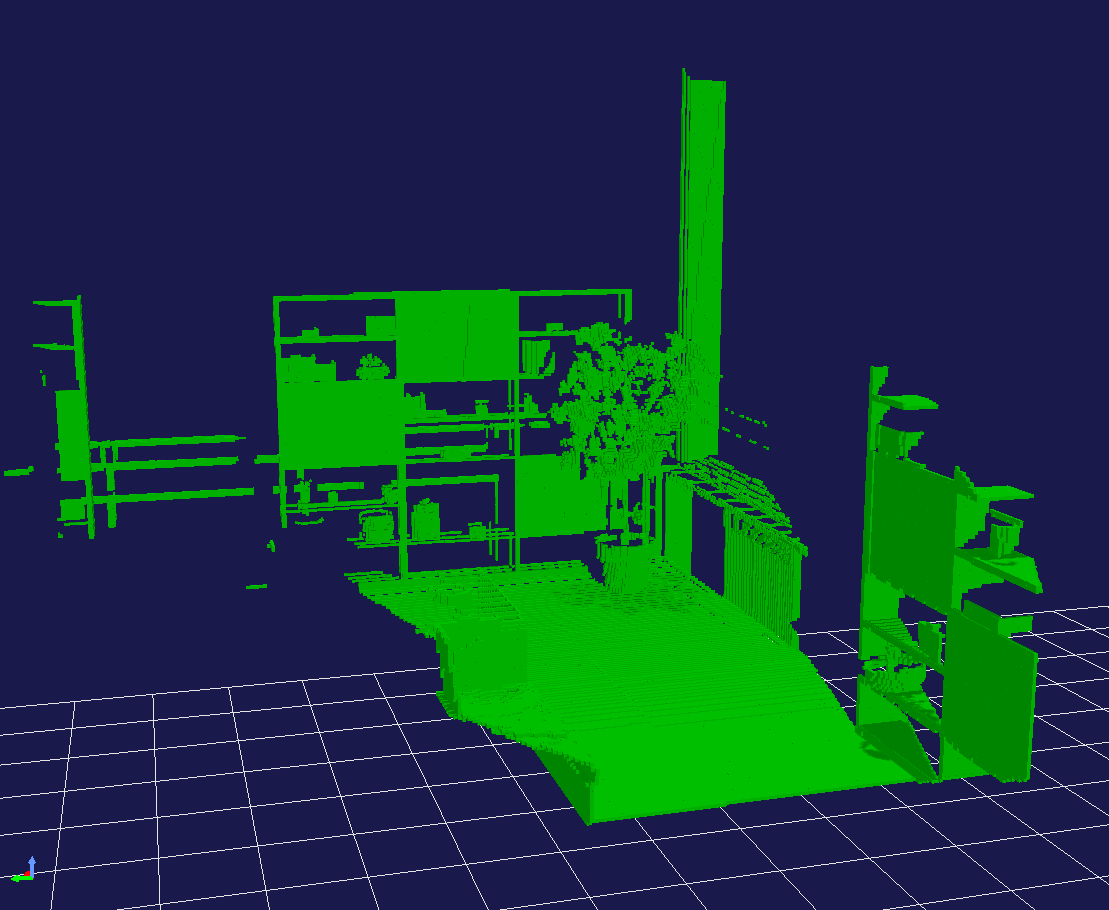

In [16]:
%display

In [17]:
di.clear()

In [18]:
di.addObject(g14)

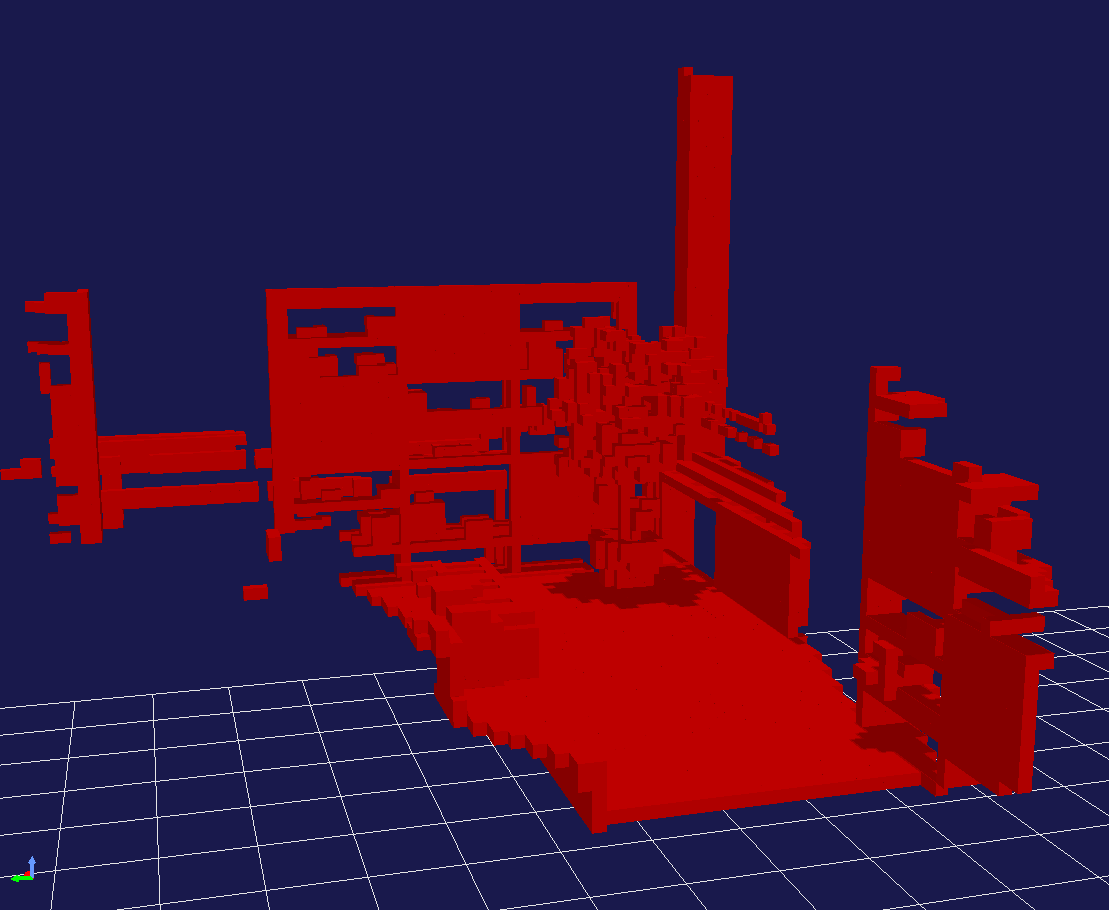

In [19]:
%display

In [20]:
di.clear()

In [21]:
di.addObject(g12)

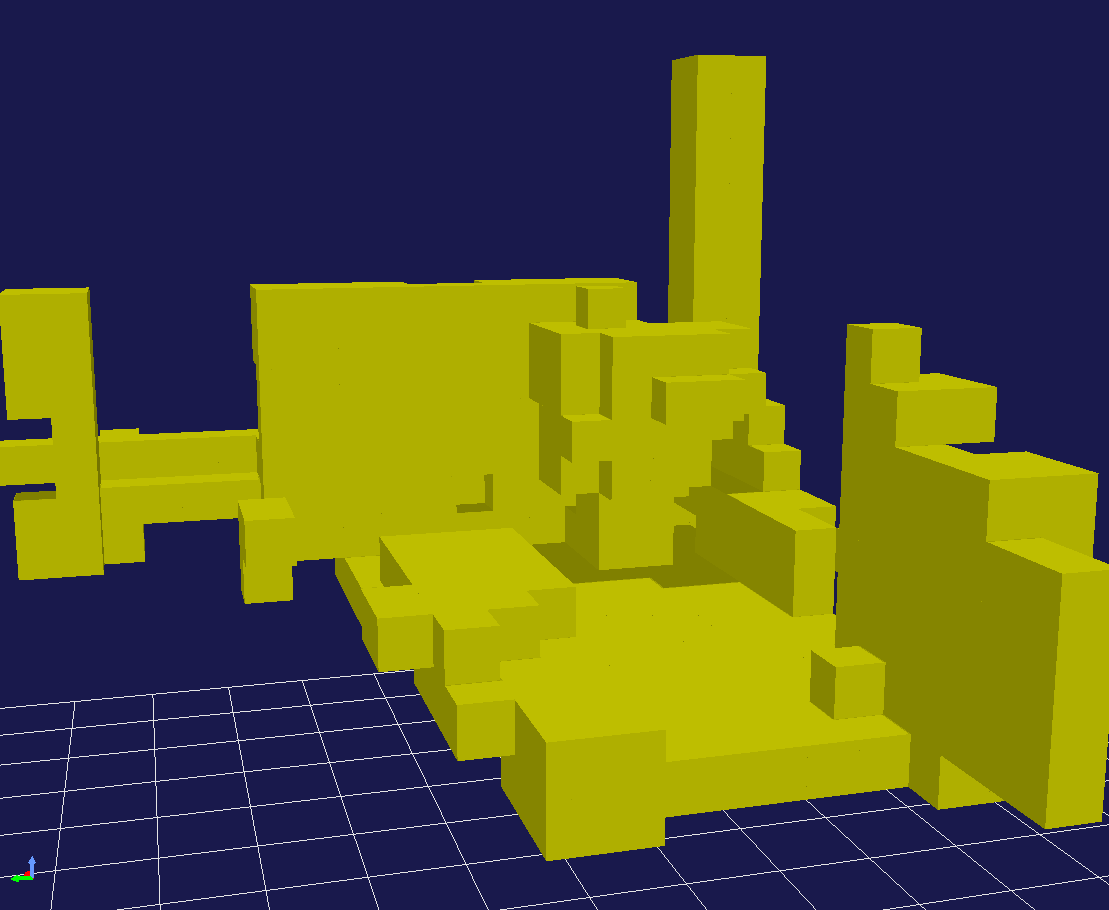

In [22]:
%display